# CV Lab 1
## Chloë Smith - 1877342

In [1]:
# imports
import cv2
import numpy as np
import scipy.stats as ss
from skimage.color import rgb2gray
from skimage import img_as_float
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

import os
import math

In [2]:
def load_images_from_folder(folder):
    images = []
    masks = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            #print(filename)
            if filename.split("-")[0] == "image":
                images.append(img)
            else:
                masks.append(img)
    return images, masks

In [3]:
# read in images and masks
images, masks = load_images_from_folder("images")

# choose ONE image to work with for sections 4, 5, 6
image = images[0]
mask = masks[0]

gray_image = rgb2gray(image)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

## Displaying the image used for Sections 4, 5, 6

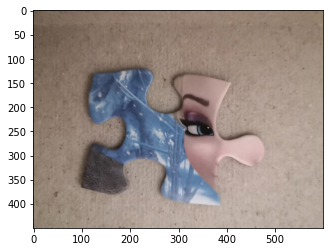

In [4]:
#print(type(image[0][0][0]))
plt.imshow(image)

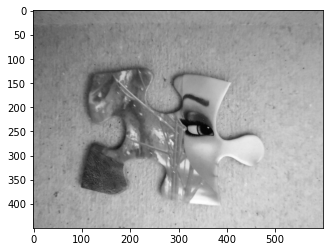

In [5]:
plt.imshow(gray_image, cmap="gray")

<class 'numpy.ndarray'>


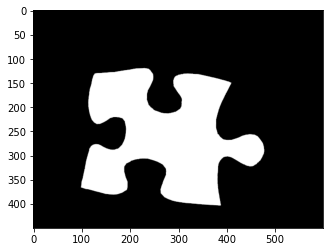

In [6]:
print(type(mask[0]))
plt.imshow(mask)

All three images:


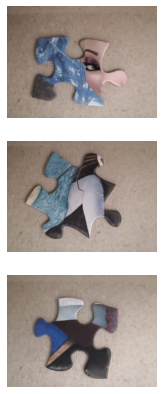

In [7]:
print("All three images:")
fig = plt.figure(figsize=(10, 7))

r = np.shape(images)[0]
c = 1
idx = 1
for img in images:
    fig.add_subplot(r, c, idx)
    plt.imshow(img)
    plt.axis('off')
    idx += 1

## Section 4: Descriptive Statistics

1. What is the width of the image?

In [8]:
# the number of columns should be the pixel width of the image
print(np.shape(image)[1])

600


2. What is the height of the image?

In [9]:
# the number of rows should be the pixel height of the image
print(np.shape(image)[0])

450


3. How many pixels are in the image in total?

In [10]:
# multiply pixel width by pixel height to compute total pixels
print(np.shape(image)[0] * np.shape(image)[1])

270000


4. How many black pixels are there in the mask?

In [11]:
dim = np.shape(mask)
count = 0
for i in range(dim[0]):
    for j in range(dim[1]):
        black = True
        for k in range(dim[2]):
            if mask[i][j][k] >= 128:
                black = False
        if black == True:
            count += 1
print(count)

209134


5. How many white pixels are there in the mask?

In [12]:
print(270000 - count)

60866


Using the grayscale version of the image...

6. What is the minimum pixel value in the image?

In [13]:
stretched_gray = gray_image*255
minimum = min([min(p) for p in stretched_gray])
print(minimum)
print("Rounded: %f" % int(round(minimum)))

13.274999999999999
Rounded: 13.000000


7. What is the maximum pixel value in the image?

In [14]:
maximum = max([max(p) for p in stretched_gray])
print(maximum)
print('Rounded: %f' % int(round(maximum)))

216.78549999999998
Rounded: 217.000000


8. What are the minimum and maximum values of the puzzle pixels?

In [15]:
# need to use mask to extract only pixels from puzzle piece in image
gray_mask = rgb2gray(mask)
gray_mask = gray_mask*255

not_puzzle = gray_mask < 128
puzzle = gray_mask >= 128

# also convert mask to binary values
gray_mask[not_puzzle] = 0
gray_mask[puzzle] = 1

puzzle_pixels = stretched_gray[puzzle]
maximum = max(puzzle_pixels)
minimum = min(puzzle_pixels)
print("Minimum: %f" % minimum)
print("\tRounded: %f" % int(round(minimum)))
print("Maximum: %f" % maximum)
print("\tRounded: %f" % int(round(maximum)))

Minimum: 13.275000
	Rounded: 13.000000
Maximum: 216.785500
	Rounded: 217.000000


9. What are the minimum and maximum values of the background pixels?

In [16]:
background_pixels = stretched_gray[not_puzzle]
maximum = max(background_pixels)
minimum = min(background_pixels)
print("Minimum: %f" % minimum)
print("\tRounded: %f" % int(round(minimum)))
print("Maximum: %f" % maximum)
print("\tRounded: %f" % int(round(maximum)))

Minimum: 28.766500
	Rounded: 29.000000
Maximum: 201.532800
	Rounded: 202.000000


10. What is the mean pixel intensity in the image?

In [17]:
mean = np.mean(stretched_gray)
print(mean)

136.87529505851853


11. What is the mean brightness of the puzzle pixels?

In [18]:
mean = np.mean(stretched_gray[puzzle])
print(mean)

117.89702932178885


12. What is the mean brightness of the background pixels?

In [19]:
mean = np.mean(stretched_gray[not_puzzle])
print(mean)

142.3986969077242


13. What is the variance in the grayscale intensities for puzzle pixels?

In [20]:
var = np.var(stretched_gray[puzzle])
print(var)

1776.5755660936015


14. What is the variance in the grayscale intensities for background pixels?

In [21]:
var = np.var(stretched_gray[not_puzzle])
print(var)

582.7826935811971


15. Display a histogram of the red pixel intensities in the image.

Histogram of red pixel intensities in image:


<AxesSubplot:ylabel='Count'>

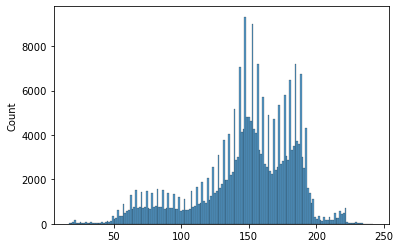

In [22]:
red_pixels = image[:,:,0]
print("Histogram of red pixel intensities in image:")
sns.histplot(red_pixels.flatten())

16. Display a histogram of the green pixel intensities in the image.

Histogram of green pixel intensities in image:


<AxesSubplot:ylabel='Count'>

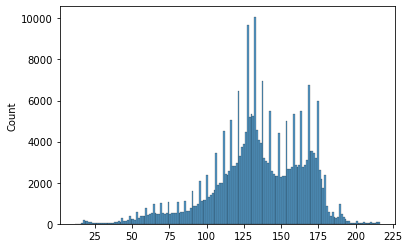

In [23]:
green_pixels = image[:,:,1]
print("Histogram of green pixel intensities in image:")
sns.histplot(green_pixels.flatten())

17. Display a histogram of the blue pixel intensities in the image.

Histogram of blue pixel intensities in image:


<AxesSubplot:ylabel='Count'>

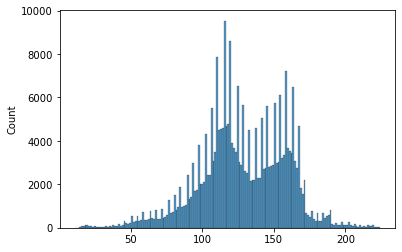

In [24]:
blue_pixels = image[:,:,2]
print("Histogram of blue pixel intensities in image:")
sns.histplot(blue_pixels.flatten())

18. Repeat the previous 3 steps for one of the mask images.

Histogram of red pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

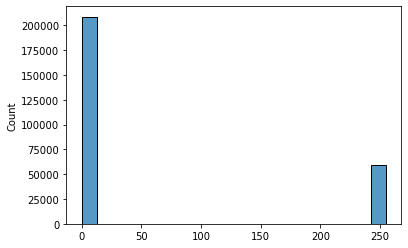

In [25]:
# red pixel intensities
red_pixels = mask[:,:,0]
print("Histogram of red pixel intensities in mask:")
sns.histplot(red_pixels.flatten())

Histogram of green pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

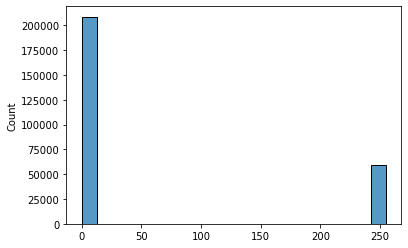

In [26]:
# green pixel intensities
green_pixels = mask[:,:,1]
print("Histogram of green pixel intensities in mask:")
sns.histplot(green_pixels.flatten())

Histogram of blue pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

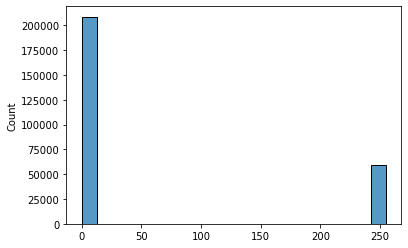

In [27]:
# blue pixel intensities
blue_pixels = mask[:,:,2]
print("Histogram of blue pixel intensities in mask:")
sns.histplot(blue_pixels.flatten())

19. Display a histogram of the pixel intensities of all pixels in the image (across all channels).

Histogram of pixel intensities in the image across all channels:


<AxesSubplot:ylabel='Count'>

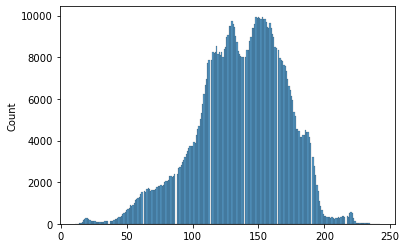

In [28]:
print("Histogram of pixel intensities in the image across all channels:")
sns.histplot(image.flatten())

20. Display a histogram of the pixel intensities of the pixels in the grayscale image.

Histogram of pixel intensities in grayscale image:


<AxesSubplot:ylabel='Count'>

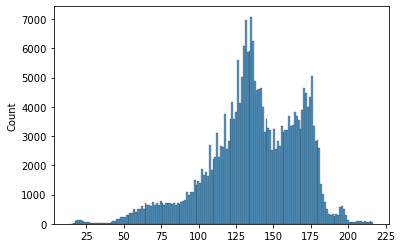

In [29]:
print("Histogram of pixel intensities in grayscale image:")
sns.histplot(stretched_gray.flatten())

21. Display the relevant histograms of the channels in the HSV image.

Histogram of hue in the image:


<AxesSubplot:ylabel='Count'>

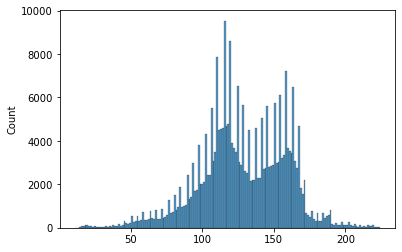

In [30]:
# hue
h_vals = hsv_image[:,:,0]
print("Histogram of hue in the image:")
sns.histplot(h_vals.flatten())

Histogram of saturation in the image:


<AxesSubplot:ylabel='Count'>

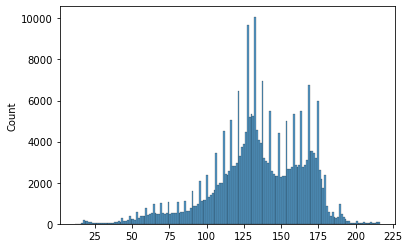

In [31]:
# saturation
s_vals = hsv_image[:,:,1]
print("Histogram of saturation in the image:")
sns.histplot(s_vals.flatten())

Histogram of value in the image:


<AxesSubplot:ylabel='Count'>

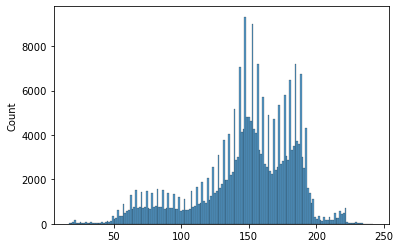

In [32]:
# value
v_vals = hsv_image[:,:,2]
print("Histogram of value in the image:")
sns.histplot(v_vals.flatten())

22. Re-plot the histograms above with Kernel Density Estimates plotted as well.

Histogram, with KDE, of red pixel intensities in image:


<AxesSubplot:ylabel='Count'>

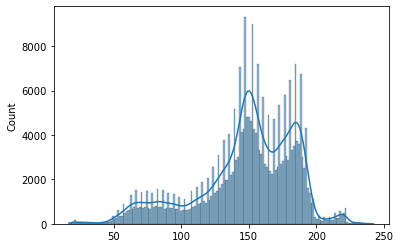

In [33]:
# red-pixel intensities
red_pixels = image[:,:,0]
print("Histogram, with KDE, of red pixel intensities in image:")
sns.histplot(red_pixels.flatten(), kde=True)

Histogram, with KDE, of green pixel intensities in image:


<AxesSubplot:ylabel='Count'>

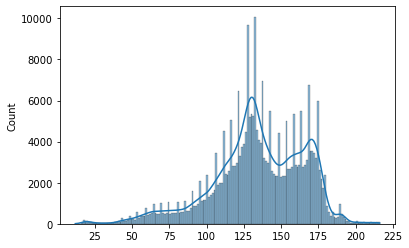

In [34]:
# green pixel intensities
green_pixels = image[:,:,1]
print("Histogram, with KDE, of green pixel intensities in image:")
sns.histplot(green_pixels.flatten(), kde=True)

Histogram, with KDE, of blue pixel intensities in image:


<AxesSubplot:ylabel='Count'>

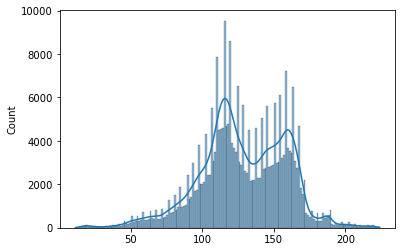

In [35]:
# blue pixel intensities
blue_pixels = image[:,:,2]
print("Histogram, with KDE, of blue pixel intensities in image:")
sns.histplot(blue_pixels.flatten(), kde=True)

Histogram, with KDE, of red pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

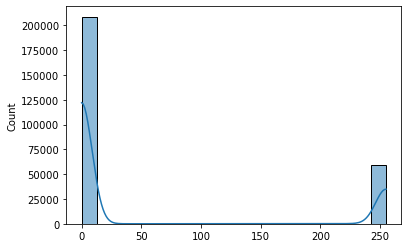

In [36]:
# red-pixel intensities
red_pixels = mask[:,:,0]
print("Histogram, with KDE, of red pixel intensities in mask:")
sns.histplot(red_pixels.flatten(), kde=True)

Histogram, with KDE, of green pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

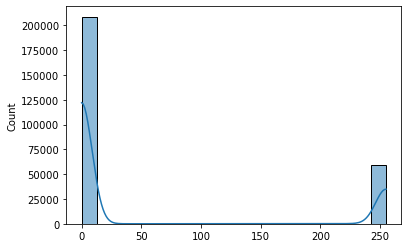

In [37]:
# green pixel intensities
green_pixels = mask[:,:,1]
print("Histogram, with KDE, of green pixel intensities in mask:")
sns.histplot(green_pixels.flatten(), kde=True)

Histogram, with KDE, of blue pixel intensities in mask:


<AxesSubplot:ylabel='Count'>

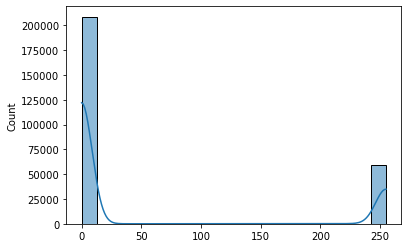

In [38]:
# blue pixel intensities
blue_pixels = mask[:,:,2]
print("Histogram, with KDE, of blue pixel intensities in mask:")
sns.histplot(blue_pixels.flatten(), kde=True)

Histogram, with KDE, of pixel intensities in the image across all channels:


<AxesSubplot:ylabel='Count'>

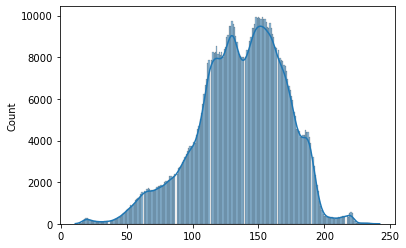

In [39]:
# pixel intensities across all channels
print("Histogram, with KDE, of pixel intensities in the image across all channels:")
sns.histplot(image.flatten(), kde=True)

Histogram, with KDE, of pixel intensities in grayscale image:


<AxesSubplot:ylabel='Count'>

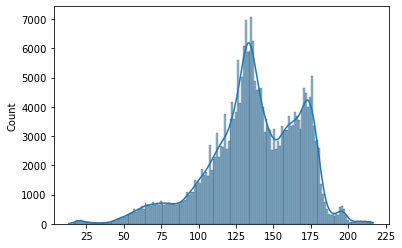

In [40]:
# pixel intensities in grayscale image
print("Histogram, with KDE, of pixel intensities in grayscale image:")
sns.histplot(stretched_gray.flatten(), kde=True)

Histogram, with KDE, of hue in the image:


<AxesSubplot:ylabel='Count'>

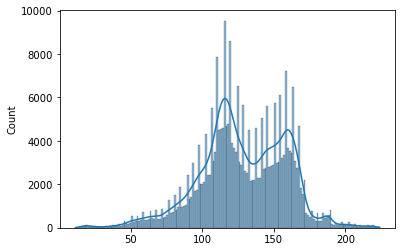

In [41]:
# hue
h_vals = hsv_image[:,:,0]
print("Histogram, with KDE, of hue in the image:")
sns.histplot(h_vals.flatten(), kde=True)

Histogram, with KDE, of saturation in the image:


<AxesSubplot:ylabel='Count'>

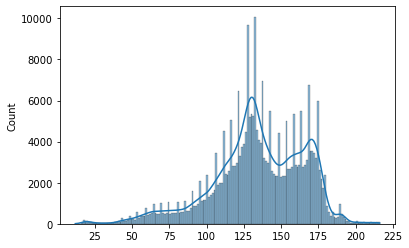

In [42]:
# saturation
s_vals = hsv_image[:,:,1]
print("Histogram, with KDE, of saturation in the image:")
sns.histplot(s_vals.flatten(), kde=True)

Histogram, with KDE, of value in the image:


<AxesSubplot:ylabel='Count'>

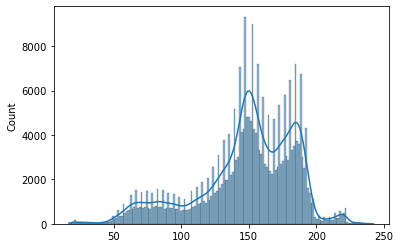

In [43]:
# value
v_vals = hsv_image[:,:,2]
print("Histogram, with KDE, of value in the image:")
sns.histplot(v_vals.flatten(), kde=True)

## Section 5: Bonus

1. Perform a contrast stretch of the image.

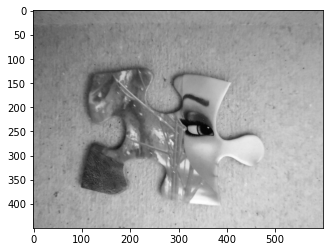

In [44]:
# before
plt.imshow(gray_image, cmap="gray")

0.2270721568627451
0.2192928620390594


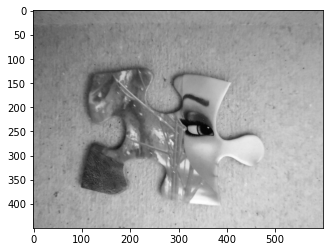

In [45]:
# perform contrast stretching
flat_gray = gray_image.flatten()
gray_image_stretched = (gray_image - min(flat_gray)) / (max(flat_gray) - min(flat_gray))

plt.imshow(gray_image_stretched, cmap="gray")

# print some values to check that this actually did something :)
print(gray_image[200,200])
print(gray_image_stretched[200,200])
# not much of a visual difference with this type of contrast stretch

2. Perform a histogram equalisation of the image

In [46]:
# TODO

## Section 6: Background Classifier

1. Write a function that applies a convolution to an image with a kernel/filter, K, that is input as a parameter to the function. Pad the image so that the height and width of the image are the same before and after the convolution is applied.

In [47]:
def convolve(img, K):
    ### convolves image img with filter/kernel K, using same zero padding ###
    
    # rotate filter 180 degrees
    K = np.rot90(K, k=2)
    k_dim = np.shape(K)
    
    # padding
    if np.shape(np.shape(img))[0] == 2:
        temp = np.empty([np.shape(img)[0], np.shape(img)[1], 1])
        temp[:, :, 0] = img
        img = temp
        
    dim = np.shape(img)
    p_h = math.floor((k_dim[0] - 1) / 2)
    p_w = math.floor((k_dim[1] - 1) / 2)
    
    pad_img = np.pad(img, ((p_h,p_h), (p_w,p_w), (0,0)), 'constant')
    
    # convolution
    temp = np.shape(pad_img)
    out_dim = np.array([temp[0] - k_dim[0] + 1,
                        temp[1] - k_dim[1] + 1,
                        dim[2]])
    out = np.zeros(out_dim)
    
    in_dim = np.shape(pad_img)
    
    # for each channel
    for i in range(dim[2]):
        curr_y = out_y = 0
        while curr_y <= in_dim[0] - k_dim[0]:
            curr_x = out_x = 0
            while curr_x <= in_dim[1] - k_dim[0]:
                img_slice = pad_img[curr_y:curr_y+k_dim[0], curr_x:curr_x+k_dim[0], i]
                assert np.shape(img_slice) == np.shape(K)
                filt_val = np.sum(np.multiply(img_slice, K))
                out[out_y, out_x, i] = filt_val
                curr_x += 1
                out_x += 1
            curr_y += 1
            out_y += 1
            
    return out

In [48]:
# debug/test convolve function
d_K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]
d_img = [[1, 2, 0, 2, 2],
        [1, 0, 2, 1, 0],
        [0, 0, 1, 0, 2],
        [0, 1, 2, 2, 0],
        [0, 0, 0, 0, 1]]
#d_img = [[[1,1,1], [2,2,2], [0,0,0], [2,2,2], [2,2,2]],
        #[[1,1,1], [0,0,0], [2,2,2], [1,1,1], [0,0,0]],
        #[[0,0,0], [0,0,0], [1,1,1], [0,0,0], [2,2,2]],
        #[[0,0,0], [1,1,1], [2,2,2], [2,2,2], [0,0,0]],
        #[[0,0,0], [0,0,0], [0,0,0], [0,0,0], [1,1,1]]]
result = convolve(d_img, d_K)
for i in range(np.shape(result)[0]):
    print(result[i,:,0])
#print()
#for i in range(np.shape(result)[0]):
    #print(result[i,:,1])
#print()
#for i in range(np.shape(result)[0]):
    #print(result[i,:,2])

[ 2.  0.  1.  0. -3.]
[ 2.  1.  1.  1. -3.]
[ 1.  4.  2. -3. -3.]
[ 1.  3.  1.  0. -2.]
[ 1.  2.  1. -1. -2.]


2. Apply the Vertical Prewitt, Horizontal Prewitt and Laplacian filters to one of your images (use RGB values for the image, the filter should be applied to each channel separately). We will use this one image to train a background classifier.

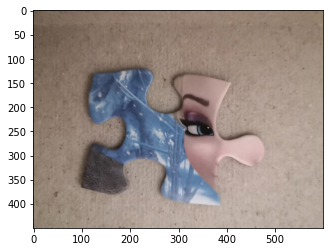

In [49]:
# display original image for comparison
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


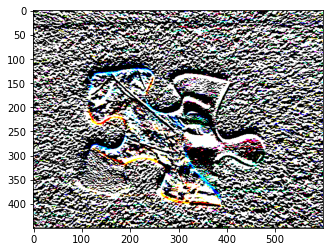

In [50]:
# Vertical Prewitt
K = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]

v_prewitt = convolve(image, K)
plt.imshow(v_prewitt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


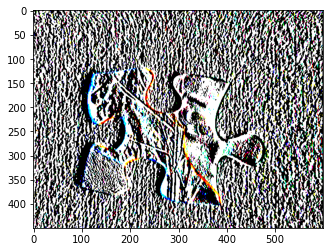

In [51]:
# Horizontal Prewitt
K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]

h_prewitt = convolve(image, K)
plt.imshow(h_prewitt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


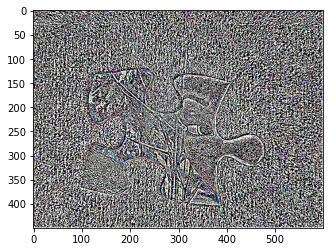

In [52]:
# Laplacian
K = [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
laplacian = convolve(image, K)
plt.imshow(laplacian)

3. Using the output from Question 2 as well as the RGB and HSV pixel values of the image (15 features in total) calculate the mean (15-dimensional vector) and covariance (15 * 15 matrix) of these features. The mean and covariance from Question 3 are the learned parameters of a multivariate Normal distribution. We can use it to make inferences about whether the pixels from a new image belong to the background.

In [53]:
# convert to float image
image = img_as_float(image)
hsv_image = img_as_float(hsv_image)
stretched_gray = img_as_float(stretched_gray)
#v_prewitt = img_as_float(v_prewitt)
#h_prewitt = img_as_float(h_prewitt)
#laplacian = img_as_float(laplacian)

In [54]:
mean = np.empty(15)
cov = np.zeros((15,15))

# normalise filtered images to floats in [0, 1]
# getting weird visual results when using img_as_float before filtering
v_prewitt = (v_prewitt - np.mean(v_prewitt)) / math.sqrt(np.var(v_prewitt))
h_prewitt = (h_prewitt - np.mean(h_prewitt)) / math.sqrt(np.var(h_prewitt))
laplacian = (laplacian - np.mean(laplacian)) / math.sqrt(np.var(laplacian))

# extract background pixels
features = []
for i in range(3):
    features.append(v_prewitt[not_puzzle,i].flatten())
for i in range(3):
    features.append(h_prewitt[not_puzzle,i].flatten())
for i in range(3):
    features.append(laplacian[not_puzzle,i].flatten())
for i in range(3):
    features.append(image[not_puzzle,i].flatten())
for i in range(3):
    features.append(hsv_image[not_puzzle,i].flatten())

# numpy.cov requires each row to represent a feature/variable
cov = np.cov(features)

# transpose so that every row contains the features for 1 pixel or data point
features = np.transpose(features)
mean = np.mean(features, axis=0)

print("Learned parameters of MVN distribution of background pixels")
print("Mean:")
print(mean)
print("\nCovariance Matrix:")
for i in range(np.shape(cov)[0]):
    print(cov[i])

Learned parameters of MVN distribution of background pixels
Mean:
[-0.02345894 -0.02296664 -0.0238878  -0.02978858 -0.02617444 -0.02492458
  0.03133651  0.01847865  0.0058771   0.61595553  0.54741653  0.49811276
  0.49811276  0.54741653  0.61595553]

Covariance Matrix:
[ 1.20398005  1.08709113  0.99228529  0.00882416  0.00905825  0.00931979
 -0.17601671 -0.17884248 -0.18184789 -0.00195328 -0.00274046 -0.0034023
 -0.0034023  -0.00274046 -0.00195328]
[ 1.08709113  0.98909491  0.90641922  0.00903993  0.00917705  0.00932582
 -0.17880882 -0.1789533  -0.17969148 -0.00178646 -0.00252066 -0.00314578
 -0.00314578 -0.00252066 -0.00178646]
[ 0.99228529  0.90641922  0.8416477   0.00937676  0.00941914  0.00940105
 -0.1812053  -0.17899311 -0.17757227 -0.0019429  -0.00267821 -0.00334282
 -0.00334282 -0.00267821 -0.0019429 ]
[ 8.82416176e-03  9.03992670e-03  9.37675798e-03  1.09799116e+00
  1.00031560e+00  9.16343371e-01 -1.70410933e-01 -1.63649325e-01
 -1.59206403e-01 -8.97647375e-04 -1.21460438e-03 

4. For a second image (our validation data) obtain the same features as those which were used to train our model in Question 3. Now find the value of the probability density function of the new data points being background pixels (HINT: scipy.stats.multivariate\_normal.pdf()). Note that the value of the PDF is not the probability of the pixel being a background pixel – recall that to get the probability from a PDF you need to integrate between two values. If the PDF value of a data point coming from the background of the image is above some threshold $(\Theta)$ classify it as being background. If not it belongs to the foreground. Think about how to find a good value of $\Theta$, what threshold value gives your model the best performance? Compare your model’s predictions to the mask for this image (you will have to invert black and white pixels in the image) and calculate $accuracy = 1 - \frac{1}{N} \sum_{i=1}^{N} \lvert predict_i - test\_mask_i \rvert$.

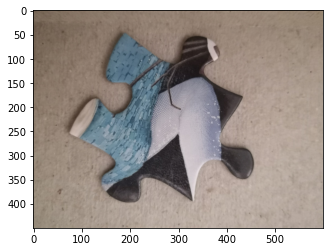

In [55]:
# second image
image_2 = images[1]
mask_2 = masks[1]

gray_image_2 = rgb2gray(image_2)
hsv_image_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR)

# convert to float image
image_2 = img_as_float(image_2)
hsv_image_2 = img_as_float(hsv_image_2)

plt.imshow(image_2)

In [56]:
# Vertical Prewitt
K = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]

v_prewitt_2 = convolve(image_2, K)
#plt.imshow(v_prewitt_2)

In [57]:
# Horizontal Prewitt
K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]

h_prewitt_2 = convolve(image_2, K)
#plt.imshow(h_prewitt_2)

In [58]:
# Laplacian
K = [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
laplacian_2 = convolve(image_2, K)
#plt.imshow(laplacian_2)

In [59]:
mean_2 = np.empty(15)
cov_2 = np.zeros((15,15))

# normalise filtered images to floats in [0, 1]
v_prewitt_2 = (v_prewitt_2 - np.mean(v_prewitt_2)) / math.sqrt(np.var(v_prewitt_2))
h_prewitt_2 = (h_prewitt_2 - np.mean(h_prewitt_2)) / math.sqrt(np.var(h_prewitt_2))
laplacian_2 = (laplacian_2 - np.mean(laplacian_2)) / math.sqrt(np.var(laplacian_2))

# use all pixels for features; 
#     we are trying to test our trained model on this image
features_2 = []
for i in range(3):
    features_2.append(v_prewitt_2[:,:,i].flatten())
for i in range(3):
    features_2.append(h_prewitt_2[:,:,i].flatten())
for i in range(3):
    features_2.append(laplacian_2[:,:,i].flatten())
for i in range(3):
    features_2.append(image_2[:,:,i].flatten())
for i in range(3):
    features_2.append(hsv_image_2[:,:,i].flatten())

# numpy.cov requires each row to represent a feature/variable
cov_2 = np.cov(features_2)

# transpose so that every row contains the features for 1 pixel or data point
features_2 = np.transpose(features_2)
mean_2 = np.mean(features_2, axis=0)

print("Parameters of MVN distribution of all pixels in second image:")
print("Mean:")
print(mean_2)
print("\nCovariance Matrix:")
for i in range(np.shape(cov_2)[0]):
    print(cov_2[i])

Parameters of MVN distribution of all pixels in second image:
Mean:
[-7.07310491e-04  9.83878830e-07  7.06326612e-04 -2.10080427e-04
 -8.09005371e-05  2.90980964e-04  6.43211205e-03 -2.03245558e-04
 -6.22886649e-03  5.72687451e-01  5.31634423e-01  5.05459550e-01
  5.05459550e-01  5.31634423e-01  5.72687451e-01]

Covariance Matrix:
[ 1.12403366  1.04281604  0.97727407  0.04740521  0.05116079  0.05373819
 -0.10141123 -0.10151737 -0.10315382 -0.00326242 -0.00283603 -0.00221709
 -0.00221709 -0.00283603 -0.00326242]
[ 1.04281604  0.9849445   0.93073758  0.05116082  0.0564867   0.05891005
 -0.10387044 -0.10275258 -0.10321926 -0.00386058 -0.00340511 -0.00284855
 -0.00284855 -0.00340511 -0.00386058]
[ 0.97727407  0.93073758  0.89103195  0.05373649  0.05890903  0.06090251
 -0.10663308 -0.10437999 -0.10382222 -0.00473435 -0.004169   -0.00359398
 -0.00359398 -0.004169   -0.00473435]
[ 0.04740521  0.05116082  0.05373649  1.08734693  1.02536129  0.97841098
 -0.07456732 -0.07078598 -0.07082709 -0.00

In [60]:
# get mask for background pixels for this second image
gray_mask_2 = rgb2gray(mask_2)
gray_mask_2 = gray_mask_2*255

not_puzzle_2 = gray_mask_2 < 128
puzzle_2 = gray_mask_2 >= 128

Accuracy: 97.317778 percent
Confusion Matrix:
[[190475   4952]
 [  2290  72283]]


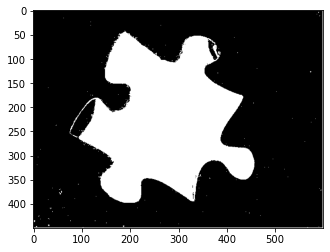

In [61]:
# perform inference step

results = ss.multivariate_normal.pdf(features_2, mean, cov, allow_singular=True)

theta = 0.01
predicted_mask = results < theta
predicted_mask = np.reshape(predicted_mask, (-1, 600))
plt.imshow(predicted_mask, cmap="gray")

correct = 0
incorrect = 0
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(np.shape(predicted_mask)[0]):
    for j in range(np.shape(predicted_mask)[1]):
        # in our mask, False indicates a background pixel
        if predicted_mask[i,j] == puzzle_2[i,j]:
            correct += 1
            if predicted_mask[i,j] == False:
                TP += 1
            else:
                TN += 1
        else:
            incorrect += 1
            if predicted_mask[i,j] == False:
                FP += 1
            else:
                FN += 1
                
accuracy_1 = correct / results.shape[0] * 100
print("Accuracy: %f percent" % accuracy_1)
confusion_matrix_1 = np.array([[TP, FN],
                            [FP, TN]])
print("Confusion Matrix:")
print(confusion_matrix_1)


# integrating between two values of the pdf is equivalent to subtracting
#    the cdf values for that range
#result = model.cdf(features_2)

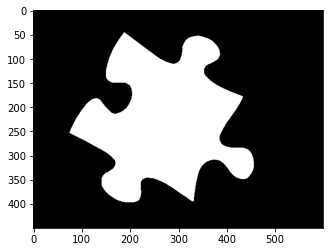

In [62]:
# display correct mask for comparison
plt.imshow(puzzle_2, cmap="gray")

5. Repeat the process from Question 3 (training) and 4 (inference) except now apply the two Prewitt filters and the Laplacian filter to the HSV representation of the image. Does this improve the accuracy of the model on the validation data? For a final attempt, repeat the training and inference without the RGB pixels altogether.

In [63]:
not_puzzle = gray_mask < 128
puzzle = gray_mask >= 128

In [64]:
# Vertical Prewitt
K = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]

v_prewitt_hsv = convolve(hsv_image, K)

In [65]:
# Horizontal Prewitt
K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]

h_prewitt_hsv = convolve(hsv_image, K)

In [66]:
# Laplacian
K = [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
laplacian_hsv = convolve(hsv_image, K)

In [67]:
mean_hsv = np.empty(15)
cov_hsv = np.zeros((15,15))

# normalise filtered images to floats in [0, 1]
# getting weird visual results when using img_as_float before filtering
v_prewitt_hsv = (v_prewitt_hsv - np.mean(v_prewitt_hsv)) / math.sqrt(np.var(v_prewitt_hsv))
h_prewitt_hsv = (h_prewitt_hsv - np.mean(h_prewitt_hsv)) / math.sqrt(np.var(h_prewitt_hsv))
laplacian_hsv = (laplacian_hsv - np.mean(laplacian_hsv)) / math.sqrt(np.var(laplacian_hsv))

# extract background pixels
features = []
for i in range(3):
    features.append(v_prewitt_hsv[not_puzzle,i].flatten())
for i in range(3):
    features.append(h_prewitt_hsv[not_puzzle,i].flatten())
for i in range(3):
    features.append(laplacian_hsv[not_puzzle,i].flatten())
for i in range(3):
    features.append(image[not_puzzle,i].flatten())
for i in range(3):
    features.append(hsv_image[not_puzzle,i].flatten())

# numpy.cov requires each row to represent a feature/variable
cov_hsv = np.cov(features)

# transpose so that every row contains the features for 1 pixel or data point
features = np.transpose(features)
mean_hsv = np.mean(features, axis=0)

print("Learned parameters of MVN distribution of background pixels")
print("Mean:")
print(mean_hsv)
print("\nCovariance Matrix:")
for i in range(np.shape(cov_hsv)[0]):
    print(cov[i])

Learned parameters of MVN distribution of background pixels
Mean:
[ 7.33411398e-04  6.13348662e-05 -7.94746264e-04  2.36288222e-04
 -3.96979720e-05 -1.96590250e-04 -7.80263182e-03 -4.12107035e-04
  8.21473885e-03  5.80548569e-01  5.27258359e-01  5.02061888e-01
  5.02061888e-01  5.27258359e-01  5.80548569e-01]

Covariance Matrix:
[ 1.20398005  1.08709113  0.99228529  0.00882416  0.00905825  0.00931979
 -0.17601671 -0.17884248 -0.18184789 -0.00195328 -0.00274046 -0.0034023
 -0.0034023  -0.00274046 -0.00195328]
[ 1.08709113  0.98909491  0.90641922  0.00903993  0.00917705  0.00932582
 -0.17880882 -0.1789533  -0.17969148 -0.00178646 -0.00252066 -0.00314578
 -0.00314578 -0.00252066 -0.00178646]
[ 0.99228529  0.90641922  0.8416477   0.00937676  0.00941914  0.00940105
 -0.1812053  -0.17899311 -0.17757227 -0.0019429  -0.00267821 -0.00334282
 -0.00334282 -0.00267821 -0.0019429 ]
[ 8.82416176e-03  9.03992670e-03  9.37675798e-03  1.09799116e+00
  1.00031560e+00  9.16343371e-01 -1.70410933e-01 -1.6

In [68]:
# Vertical Prewitt
K = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]

v_prewitt_2 = convolve(hsv_image_2, K)
#plt.imshow(v_prewitt_2)

In [69]:
# Horizontal Prewitt
K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]

h_prewitt_2 = convolve(hsv_image_2, K)
#plt.imshow(h_prewitt_2)

In [70]:
# Laplacian
K = [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
laplacian_2 = convolve(hsv_image_2, K)
#plt.imshow(laplacian_2)

In [71]:
mean_2 = np.empty(15)
cov_2 = np.zeros((15,15))

# normalise filtered images to floats in [0, 1]
v_prewitt_2 = (v_prewitt_2 - np.mean(v_prewitt_2)) / math.sqrt(np.var(v_prewitt_2))
h_prewitt_2 = (h_prewitt_2 - np.mean(h_prewitt_2)) / math.sqrt(np.var(h_prewitt_2))
laplacian_2 = (laplacian_2 - np.mean(laplacian_2)) / math.sqrt(np.var(laplacian_2))

# use all pixels for features; 
#     we are trying to test our trained model on this image
features_2 = []
for i in range(3):
    features_2.append(v_prewitt_2[:,:,i].flatten())
for i in range(3):
    features_2.append(h_prewitt_2[:,:,i].flatten())
for i in range(3):
    features_2.append(laplacian_2[:,:,i].flatten())
for i in range(3):
    features_2.append(image_2[:,:,i].flatten())
for i in range(3):
    features_2.append(hsv_image_2[:,:,i].flatten())

# numpy.cov requires each row to represent a feature/variable
cov_2 = np.cov(features_2)

# transpose so that every row contains the features for 1 pixel or data point
features_2 = np.transpose(features_2)
mean_2 = np.mean(features_2, axis=0)

print("Parameters of MVN distribution of all pixels in second image:")
print("Mean:")
print(mean_2)
print("\nCovariance Matrix:")
for i in range(np.shape(cov_2)[0]):
    print(cov_2[i])

Parameters of MVN distribution of all pixels in second image:
Mean:
[ 7.06326612e-04  9.83878830e-07 -7.07310491e-04  2.90980964e-04
 -8.09005371e-05 -2.10080427e-04 -6.22886649e-03 -2.03245558e-04
  6.43211205e-03  5.72687451e-01  5.31634423e-01  5.05459550e-01
  5.05459550e-01  5.31634423e-01  5.72687451e-01]

Covariance Matrix:
[ 0.89103195  0.93073758  0.97727407  0.06090251  0.05890903  0.05373649
 -0.10382222 -0.10437999 -0.10663308 -0.00473435 -0.004169   -0.00359398
 -0.00359398 -0.004169   -0.00473435]
[ 0.93073758  0.9849445   1.04281604  0.05891005  0.0564867   0.05116082
 -0.10321926 -0.10275258 -0.10387044 -0.00386058 -0.00340511 -0.00284855
 -0.00284855 -0.00340511 -0.00386058]
[ 0.97727407  1.04281604  1.12403366  0.05373819  0.05116079  0.04740521
 -0.10315382 -0.10151737 -0.10141123 -0.00326242 -0.00283603 -0.00221709
 -0.00221709 -0.00283603 -0.00326242]
[ 0.06090251  0.05891005  0.05373819  0.92667538  0.94905462  0.97841098
 -0.06717709 -0.0681441  -0.07247398 -0.00

Accuracy: 95.247407 percent
Confusion Matrix:
[[184261  11166]
 [  1666  72907]]


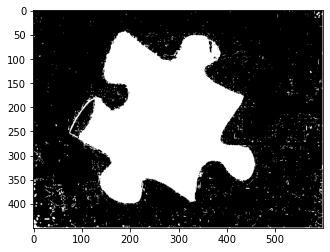

In [72]:
#flat_gray_mask_2 = gray_mask_2.flatten()
#not_puzzle = flat_gray_mask_2 < 128
# perform inference step

results = ss.multivariate_normal.pdf(features_2, mean, cov, allow_singular=True)

theta = 45
predicted_mask_2 = results < theta
predicted_mask_2 = np.reshape(predicted_mask_2, (-1, 600))
plt.imshow(predicted_mask_2, cmap="gray")

correct = 0
incorrect = 0
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(np.shape(predicted_mask_2)[0]):
    for j in range(np.shape(predicted_mask_2)[1]):
        # in our mask, False indicates a background pixel
        if predicted_mask_2[i,j] == puzzle_2[i,j]:
            correct += 1
            if predicted_mask_2[i,j] == False:
                TP += 1
            else:
                TN += 1
        else:
            incorrect += 1
            if predicted_mask_2[i,j] == False:
                FP += 1
            else:
                FN += 1
                
accuracy_2 = correct / results.shape[0] * 100
print("Accuracy: %f percent" % accuracy_2)
confusion_matrix_2 = np.array([[TP, FN],
                            [FP, TN]])
print("Confusion Matrix:")
print(confusion_matrix_2)


# integrating between two values of the pdf is equivalent to subtracting
#    the cdf values for that range
#result = model.cdf(features_2)

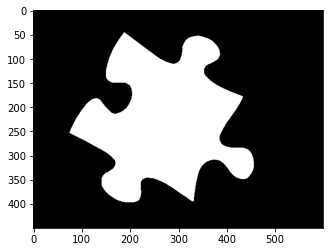

In [73]:
# display correct mask for comparison
plt.imshow(puzzle_2, cmap= "gray")

6. Use the model from above which gave the best accuracy. Apply it to your third (test) image. What is its accuracy? What else could be done to improve the models performance?

### Using the first (RGB) model which had 97.3% accuracy:

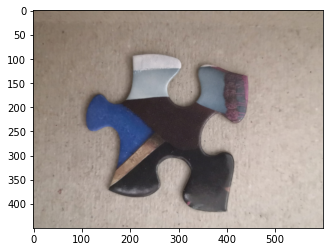

In [74]:
# third image
image_3 = images[2]
mask_3 = masks[2]

gray_image_3 = rgb2gray(image_3)
hsv_image_3 = cv2.cvtColor(image_3, cv2.COLOR_RGB2BGR)

# convert to float image
image_3 = img_as_float(image_3)
hsv_image_3 = img_as_float(hsv_image_3)

plt.imshow(image_3)

In [75]:
# Vertical Prewitt
K = [[1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]]

v_prewitt_3 = convolve(image_3, K)
#plt.imshow(v_prewitt_2)

In [76]:
# Horizontal Prewitt
K = [[1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]

h_prewitt_3 = convolve(image_3, K)
#plt.imshow(h_prewitt_2)

In [77]:
# Laplacian
K = [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
laplacian_3 = convolve(image_3, K)
#plt.imshow(laplacian_2)

In [78]:
mean_2 = np.empty(15)
cov_2 = np.zeros((15,15))

# normalise filtered images to floats in [0, 1]
v_prewitt_3 = (v_prewitt_3 - np.mean(v_prewitt_3)) / math.sqrt(np.var(v_prewitt_3))
h_prewitt_3 = (h_prewitt_3 - np.mean(h_prewitt_3)) / math.sqrt(np.var(h_prewitt_3))
laplacian_3 = (laplacian_3 - np.mean(laplacian_3)) / math.sqrt(np.var(laplacian_3))

# use all pixels for features; 
#     we are trying to test our trained model on this image
features_2 = []
for i in range(3):
    features_2.append(v_prewitt_3[:,:,i].flatten())
for i in range(3):
    features_2.append(h_prewitt_3[:,:,i].flatten())
for i in range(3):
    features_2.append(laplacian_3[:,:,i].flatten())
for i in range(3):
    features_2.append(image_3[:,:,i].flatten())
for i in range(3):
    features_2.append(hsv_image_3[:,:,i].flatten())

# numpy.cov requires each row to represent a feature/variable
cov_2 = np.cov(features_2)

# transpose so that every row contains the features for 1 pixel or data point
features_2 = np.transpose(features_2)
mean_2 = np.mean(features_2, axis=0)

print("Parameters of MVN distribution of all pixels in third image:")
print("Mean:")
print(mean_2)
print("\nCovariance Matrix:")
for i in range(np.shape(cov_2)[0]):
    print(cov_2[i])

Parameters of MVN distribution of all pixels in third image:
Mean:
[-7.69405553e-04 -4.51481010e-05  8.14553654e-04 -2.71464097e-04
 -5.02938944e-05  3.21757992e-04  5.80321353e-03 -8.44071249e-05
 -5.71880640e-03  6.01297996e-01  5.59075294e-01  5.37379797e-01
  5.37379797e-01  5.59075294e-01  6.01297996e-01]

Covariance Matrix:
[ 1.12227687  1.04567416  0.97230686  0.04160438  0.03591611  0.03127935
 -0.13516097 -0.13947147 -0.14509255 -0.00381794 -0.00413698 -0.0040012
 -0.0040012  -0.00413698 -0.00381794]
[ 1.04567416  0.98931698  0.92598374  0.03591661  0.03113906  0.02823349
 -0.13613504 -0.13933557 -0.14387243 -0.00366629 -0.00395476 -0.0038135
 -0.0038135  -0.00395476 -0.00366629]
[ 0.97230686  0.92598374  0.88841601  0.0312759   0.02823041  0.02723329
 -0.13946357 -0.14134647 -0.14463425 -0.00418126 -0.00442319 -0.00426328
 -0.00426328 -0.00442319 -0.00418126]
[ 0.04160438  0.03591661  0.0312759   1.10786273  1.03735404  0.96372658
 -0.14576299 -0.14376891 -0.1434446  -0.00425

In [79]:
# get mask for background pixels for this second image
gray_mask_3 = rgb2gray(mask_3)
gray_mask_3 = gray_mask_3*255

not_puzzle_3 = gray_mask_3 < 128
puzzle_3 = gray_mask_3 >= 128

Accuracy: 97.352963 percent
Confusion Matrix:
[[203256   6363]
 [   784  59597]]


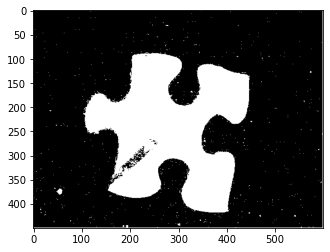

In [80]:
# perform inference step
results = ss.multivariate_normal.pdf(features_2, mean, cov, allow_singular=True)

theta = 0.01
predicted_mask_3 = results < theta
predicted_mask_3 = np.reshape(predicted_mask_3, (-1, 600))
plt.imshow(predicted_mask_3, cmap="gray")

correct = 0
incorrect = 0
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(np.shape(predicted_mask_3)[0]):
    for j in range(np.shape(predicted_mask_3)[1]):
        # in our mask, False indicates a background pixel
        if predicted_mask_3[i,j] == puzzle_3[i,j]:
            correct += 1
            if predicted_mask_3[i,j] == False:
                TP += 1
            else:
                TN += 1
        else:
            incorrect += 1
            if predicted_mask_3[i,j] == False:
                FP += 1
            else:
                FN += 1
                
accuracy_3 = correct / results.shape[0] * 100
print("Accuracy: %f percent" % accuracy_3)
confusion_matrix_3 = np.array([[TP, FN],
                            [FP, TN]])
print("Confusion Matrix:")
print(confusion_matrix_3)


# integrating between two values of the pdf is equivalent to subtracting
#    the cdf values for that range
#result = model.cdf(features_2)

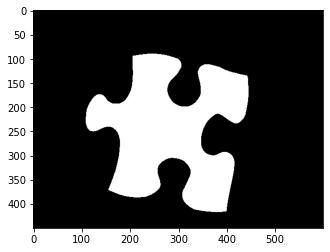

In [81]:
# display correct mask for comparison
plt.imshow(puzzle_3, cmap="gray")

7. Analyse the performance of the previous models in detail:

(a) Calculate the confusion matrices for both models on the test image.

In [82]:
print("Confusion matrix of the RGB model on test image:")
print(confusion_matrix_3)
print()

Confusion matrix of the RGB model on test image:
[[203256   6363]
 [   784  59597]]



Accuracy: 87.001481 percent
Confusion Matrix:
[[189713  19906]
 [ 15190  45191]]


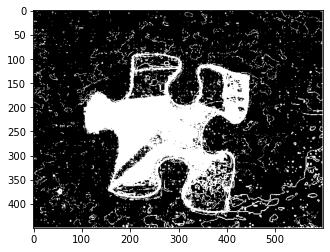

In [83]:
# perform inference step for other (HSV) model
results = ss.multivariate_normal.pdf(features_2, mean_hsv, cov_hsv, allow_singular=True)

theta = 21
predicted_mask_4 = results < theta
predicted_mask_4 = np.reshape(predicted_mask_4, (-1, 600))
plt.imshow(predicted_mask_4, cmap="gray")

correct = 0
incorrect = 0
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(np.shape(predicted_mask_4)[0]):
    for j in range(np.shape(predicted_mask_4)[1]):
        # in our mask, False indicates a background pixel
        if predicted_mask_4[i,j] == puzzle_3[i,j]:
            correct += 1
            if predicted_mask_4[i,j] == False:
                TP += 1
            else:
                TN += 1
        else:
            incorrect += 1
            if predicted_mask_4[i,j] == False:
                FP += 1
            else:
                FN += 1
                
accuracy_4 = correct / results.shape[0] * 100
print("Accuracy: %f percent" % accuracy_4)
confusion_matrix_4 = np.array([[TP, FN],
                            [FP, TN]])
print("Confusion Matrix:")
print(confusion_matrix_4)


# integrating between two values of the pdf is equivalent to subtracting
#    the cdf values for that range
#result = model.cdf(features_2)

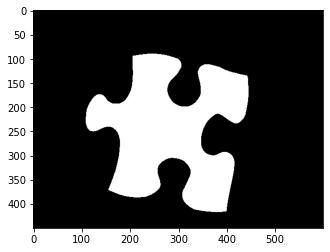

In [84]:
plt.imshow(puzzle_3, cmap="gray")

(b) Based on the confusion matrices, calculate the Cohens Kappa for both models on the test image.

In [85]:
#[[TP, FN],
#[FP, TN]]
TP_1 = confusion_matrix_3[0,0]
FN_1 = confusion_matrix_3[0,1]
FP_1 = confusion_matrix_3[1,0]
TN_1 = confusion_matrix_3[1,1]
TP_2 = confusion_matrix_4[0,0]
FN_2 = confusion_matrix_4[0,1]
FP_2 = confusion_matrix_4[1,0]
TN_2 = confusion_matrix_4[1,1]

kappa_1 = (2 * ((TP_1*TN_1) - (FN_1*FP_1))) / (((TP_1 + FP_1) * (FP_1 + TN_1)) + ((TP_1 + FN_1) * (FN_1 + TN_1)))

kappa_2 = (2 * ((TP_2*TN_2) - (FN_2*FP_2))) / (((TP_2 + FP_2) * (FP_2 + TN_2)) + ((TP_2 + FN_2) * (FN_2 + TN_2)))

# something went very wrong here
print("Cohen's Kappa for RGB model: %f" % kappa_1)
print("Cohen's Kappa for HSV model: %f" % kappa_2)

Cohen's Kappa for RGB model: -4.121194
Cohen's Kappa for HSV model: -2.572344


D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in long_scalars
  if sys.path[0] == '':
D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in long_scalars
  


(c) Calculate the intersection-over-union of the predicted mask.

In [86]:
# predicted mask from the best-performing (RGB) model
overlap = 0
for i in range(predicted_mask_3.shape[0]):
    for j in range(predicted_mask_3.shape[1]):
        # false because we were predicting background pixels
        if predicted_mask_3[i,j] == False:
            if puzzle_3[i,j] == False:
                overlap += 1

# count zero for False (background pixels)
union = (predicted_mask_3.shape[0]*predicted_mask_3.shape[1] - np.count_nonzero(predicted_mask_3)) + (puzzle_3.shape[0]*puzzle_3.shape[1] - np.count_nonzero(puzzle_3)) - overlap
intersection_over_union = overlap / union
print("Intersection-over-union of predicted mask from RGB model: %f" % intersection_over_union)

Intersection-over-union of predicted mask from RGB model: 0.966032


(d) Plot the Receiver Operating Characteristic (ROC) curve and Precision-Recall curves by varying the threshold $(\Theta)$ on the probability density of the background model. How could you use this graph to find an optimal threshold?

In [87]:
# TODO